<a href="https://colab.research.google.com/github/yumnaAlshalak/Devices-Price-Classification-System-using-Python-and-Spring-Boot/blob/main/Price%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
# find duplicated values
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df["sc_size"]=df["sc_h"]*df["sc_w"]

<ipython-input-9-9852319522f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sc_size"]=df["sc_h"]*df["sc_w"]


In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
dtype: int64

In [11]:
df=df.drop(["sc_h","sc_w"],axis=1)

In [12]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,19,0,0,1,1,63.0
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,7,1,1,0,2,51.0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,9,1,1,0,2,22.0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,11,1,0,0,2,128.0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,15,1,1,0,1,16.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  talk_time      1991 non-null   int64  
 15  three_g        1991 non-null   int64  
 16  touch_screen   1991 non-null   int64  
 17  wifi           1991 non-null   int64  
 18  price_range  

In [14]:
df["px_size"]=df["px_height"]*df["px_width"]

In [15]:
df=df.drop(["px_height","px_width"],axis=1)

In [16]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size,px_size
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2549.0,19,0,0,1,1,63.0,15120.0
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2631.0,7,1,1,0,2,51.0,1799140.0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2603.0,9,1,1,0,2,22.0,2167308.0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2769.0,11,1,0,0,2,128.0,2171776.0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1411.0,15,1,1,0,1,16.0,1464096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,14.0,668.0,19,1,1,0,0,52.0,2309580.0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,3.0,2032.0,16,1,1,1,2,110.0,1797975.0
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,3.0,3057.0,5,1,1,0,3,9.0,1416576.0
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,869.0,19,1,1,1,0,180.0,225120.0


##Visualization

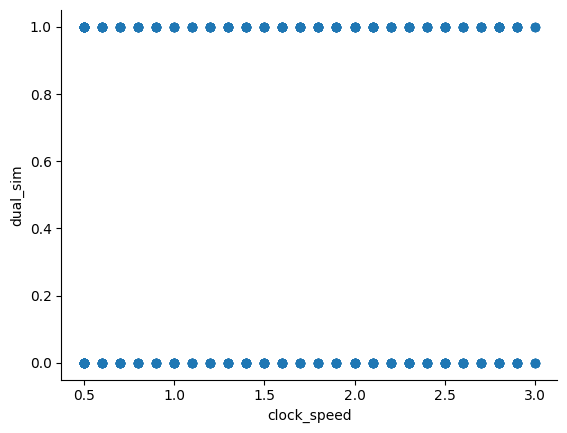

In [17]:
# @title clock_speed vs dual_sim

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='clock_speed', y='dual_sim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

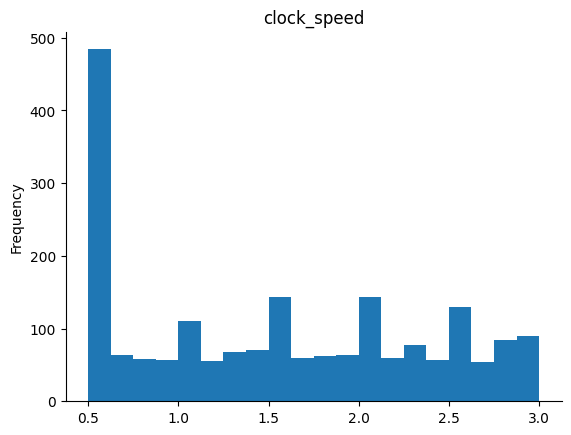

In [18]:
# @title clock_speed

from matplotlib import pyplot as plt
df['clock_speed'].plot(kind='hist', bins=20, title='clock_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

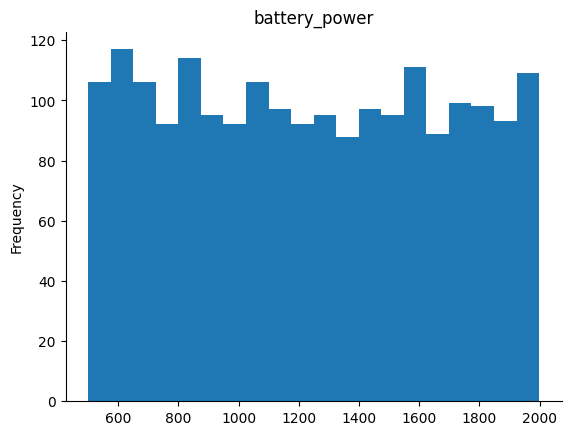

In [19]:
# @title battery_power

from matplotlib import pyplot as plt
df['battery_power'].plot(kind='hist', bins=20, title='battery_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

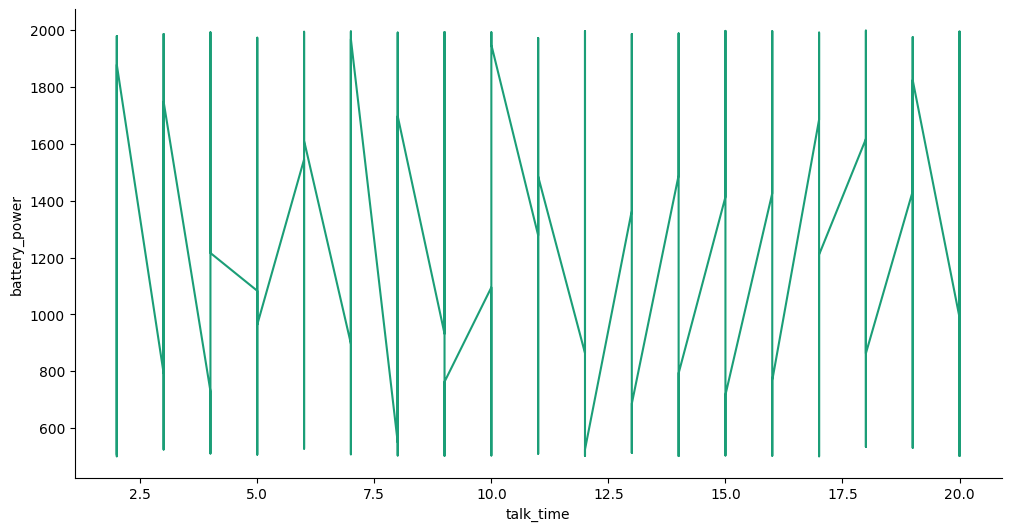

In [20]:
# @title talk_time vs battery_power

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['battery_power']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('battery_power')

<Axes: xlabel='talk_time', ylabel='battery_power'>

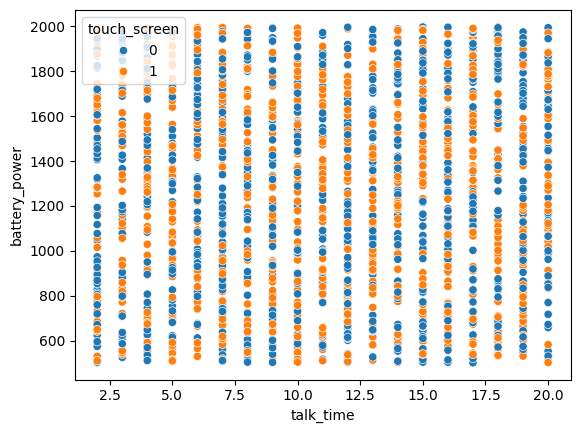

In [21]:
import seaborn as sns
sns.scatterplot(data=df, x="talk_time", y="battery_power", hue="touch_screen")

In [22]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size,px_size
battery_power,1.000000,0.011104,0.013228,-0.039297,0.033141,0.016017,-0.004863,0.031583,0.000248,-0.029953,0.029965,-0.001069,0.050669,0.011558,-0.011828,-0.008665,0.199277,-0.025601,0.015398
blue,0.011104,1.000000,0.019737,0.032818,0.003429,0.014893,0.042797,0.002838,-0.008034,0.036781,-0.010640,0.027858,0.016090,-0.030131,0.012583,-0.020515,0.021330,-0.008941,-0.017063
clock_speed,0.013228,0.019737,1.000000,-0.004107,0.002249,-0.039562,0.008581,-0.013557,0.012485,-0.005830,-0.001630,0.002934,-0.011362,-0.044650,0.022759,-0.022777,-0.006675,-0.006639,-0.013731
dual_sim,-0.039297,0.032818,-0.004107,1.000000,-0.028049,0.004630,-0.015270,-0.021391,-0.006974,-0.023292,-0.015014,0.041885,-0.036327,-0.013804,-0.014645,0.024390,0.019108,-0.017036,-0.015873
fc,0.033141,0.003429,0.002249,-0.028049,1.000000,-0.018603,-0.026542,-0.001497,0.024745,-0.014378,0.644641,0.018691,-0.006016,0.000422,-0.016109,0.018817,0.024738,-0.011514,-0.011763
four_g,0.016017,0.014893,-0.039562,0.004630,-0.018603,1.000000,0.008367,-0.000987,-0.016106,-0.030472,-0.008583,0.007361,-0.045557,0.584403,0.015437,-0.020046,0.015537,0.037975,-0.004469
int_memory,-0.004863,0.042797,0.008581,-0.015270,-0.026542,0.008367,1.000000,0.005232,-0.035050,-0.026921,-0.032557,0.029840,-0.003210,-0.008742,-0.027435,0.008377,0.041812,0.023260,0.017297
m_dep,0.031583,0.002838,-0.013557,-0.021391,-0.001497,-0.000987,0.005232,1.000000,0.021447,-0.002861,0.025584,-0.010281,0.016692,-0.011605,-0.002461,-0.027577,-0.001396,-0.023077,0.022904
mobile_wt,0.000248,-0.008034,0.012485,-0.006974,0.024745,-0.016106,-0.035050,0.021447,1.000000,-0.019204,0.020420,-0.004048,0.003889,0.003703,-0.013367,0.001625,-0.032168,-0.025988,-0.008296
n_cores,-0.029953,0.036781,-0.005830,-0.023292,-0.014378,-0.030472,-0.026921,-0.002861,-0.019204,1.000000,-0.002589,0.005224,0.012299,-0.015026,0.023327,-0.011149,0.004662,0.021990,-0.000120


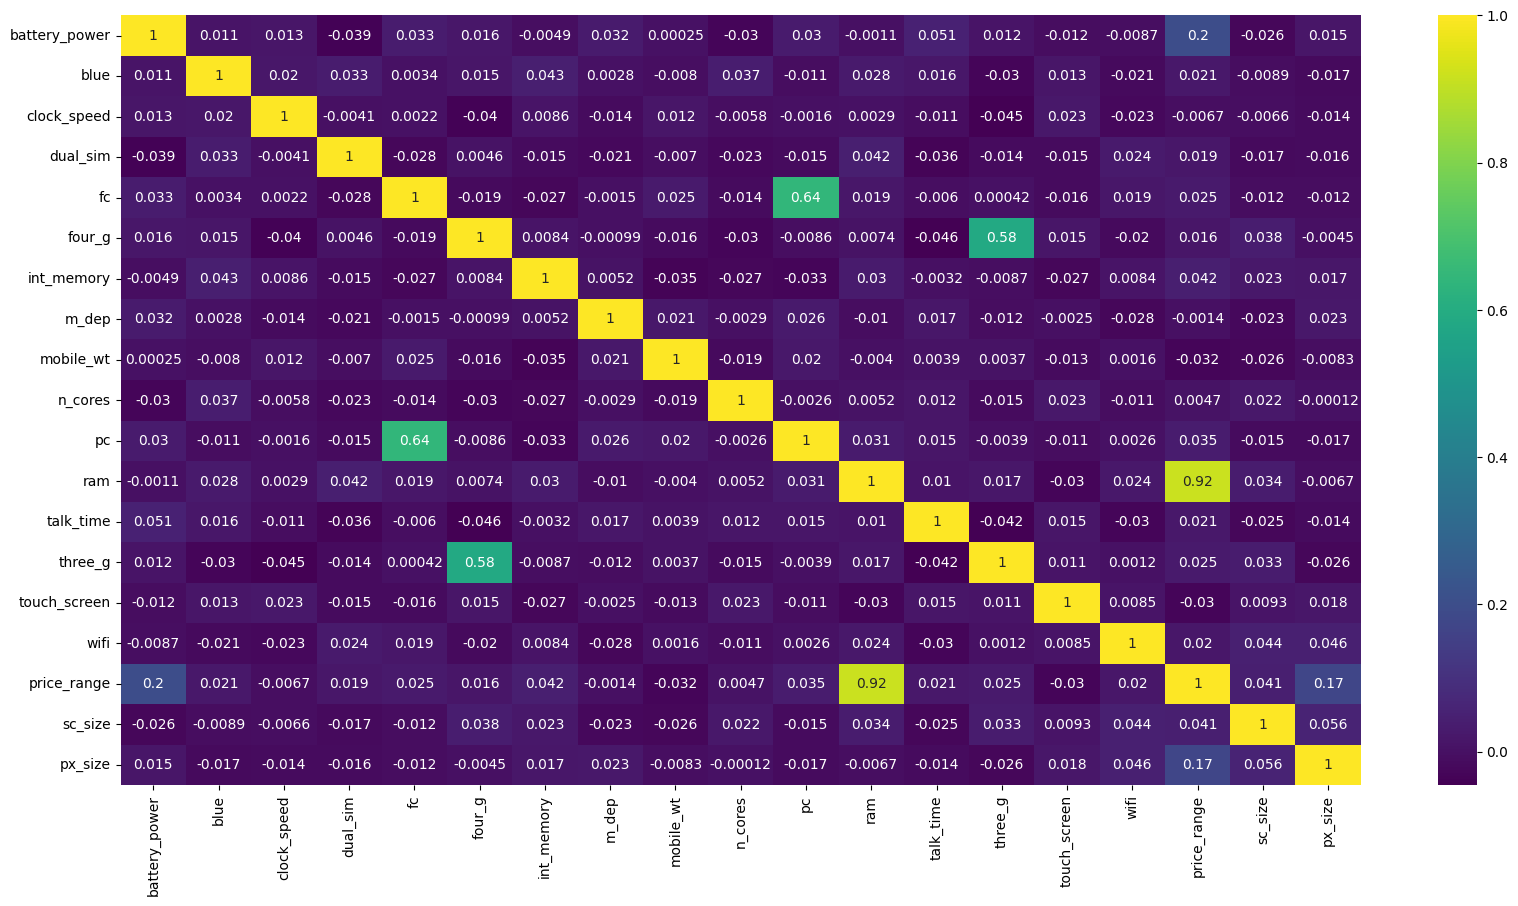

In [23]:
fig=plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

In [24]:
train = df.drop("price_range",axis=1)
target = df["price_range"].copy()

#Select Model

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

we want to predict the prices so we need to use regression for prediction ( linear regression)

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
model.score(X_train, y_train)

0.9135260168954797

In [30]:
df_test=pd.read_csv("test.csv")

In [31]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [32]:
df_test=df_test.dropna()

#Test the model

In [33]:
df_test["sc_size"]=df_test["sc_h"]*df_test["sc_w"]
df_test=df_test.drop(["sc_h","sc_w"],axis=1)

In [34]:
df_test["px_size"]=df_test["px_height"]*df_test["px_width"]
df_test=df_test.drop(["px_height","px_width"],axis=1)

In [35]:
df_test=df_test.drop(["id"],axis=1)

In [36]:
y_pred = model.predict(X_val)

In [37]:
from sklearn.metrics import confusion_matrix
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
cm = confusion_matrix(y_val, y_pred_binary)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 96  10   0   0]
 [  0  89   0   0]
 [  0 107   0   0]
 [  0  97   0   0]]


Class 0 (Row 1):
True Positives (TP): 96 instances of Class 0 were correctly predicted as Class 0.

Class 1 (Row 2):
True Positives (TP): 89 instances of Class 1 were correctly predicted as Class 1.
False Positives (FP): 10 instances were incorrectly predicted as Class 0 when they actually belonged to other classes.

Class 2 (Row 3):
False Positives (FP): 107 instances were incorrectly predicted as Class 2 when they actually belonged to other classes.

Class 3 (Row 4):
False Positives (FP): 97 instances were incorrectly predicted as Class 3 when they actually belonged to other classes.


In [38]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

In [39]:
cv_scores = -cv_scores
print("Cross-Validation Mean MSE:", np.mean(cv_scores))

Cross-Validation Mean MSE: 0.1107742728597804


We defined a K-fold cross-validation method with 5 folds (num_folds = 5).
We used the cross_val_score function to perform cross-validation. This function takes the model, feature matrix (X), target variable (y), cross-validation method (cv), and evaluation metric (scoring) as inputs.
We specified the evaluation metric as negative mean squared error ('neg_mean_squared_error') since scikit-learn maximizes scores, but we want to minimize MSE.

 MSE measures the average squared difference between the actual and predicted values

#Endpoint

In [39]:
from flask import Flask, request, jsonify
import numpy as np
from sklearn.linear_model import LinearRegression
import csv
import json

app = Flask(__name__)

# Load your trained model
model = LinearRegression()
# if we need csv file as input we can convert it to json
def csv_to_json(csv_file_path, json_file_path):

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        data = []
        for row in csv_reader:

            data.append(row)

    with open(json_file_path, 'w') as json_file:

        json.dump(data, json_file, indent=4)


def predict_price(features):

    features_np = np.array(features).reshape(1, -1)

    prediction = model.predict(features_np)

    return prediction[0]  # Return the predicted price

# Define an endpoint for receiving input data and returning predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input data from JSON format
    features = data['features']  # Extract features from input data

    # Make prediction
    prediction = predict_price(features)

    # Return prediction as JSON response
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)
